# Titanic Survival Data Set

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [3]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train_df.shape
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
miss_val = train_df.isnull().sum()
miss_full_data = miss_val[miss_val > 0].sort_values(ascending = False)
print('Columns with missing values:',len(miss_full_data))
print(miss_full_data)

Columns with missing values: 3
Cabin       687
Age         177
Embarked      2
dtype: int64


In [24]:
train_index = train_df['PassengerId']
test_index = test_df['PassengerId']
test_index

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [29]:
full_df = pd.concat([train_df] + [test_df],sort=False)


In [31]:
full_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
miss_val = full_df.isnull().sum()
miss_full_data = miss_val[miss_val > 0].sort_values(ascending = False)
print('Columns with missing values:',len(miss_full_data))
print(miss_full_data)

Columns with missing values: 5
Cabin       1014
Survived     418
Age          263
Embarked       2
Fare           1
dtype: int64


In [35]:
full_df['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [36]:
temp_sex = train_df[['Survived', 'Sex']].groupby(['Sex'], as_index=False).mean()
temp_sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


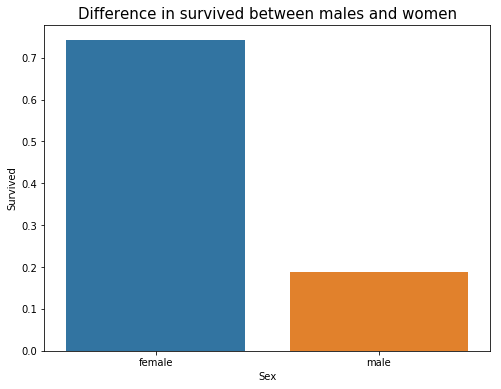

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sex', y='Survived', data=temp_sex)
plt.title('Difference in survived between males and women', size=15);


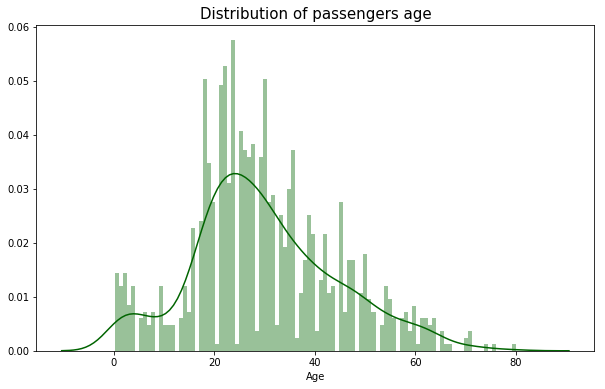

In [41]:
plt.figure(figsize=(10,6))

sns.distplot(full_df['Age'], color='darkgreen', bins=100)

plt.title('Distribution of passengers age', size=15);

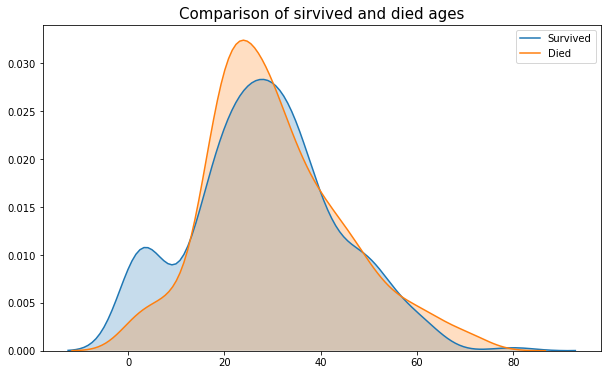

In [42]:
plt.figure(figsize=(10,6))


sns.kdeplot(full_df.loc[full_df['Survived']==1,'Age'], label='Survived', shade=True)
sns.kdeplot(full_df.loc[full_df['Survived']==0,'Age'], label='Died', shade=True)

plt.title('Comparison of sirvived and died ages', size=15);

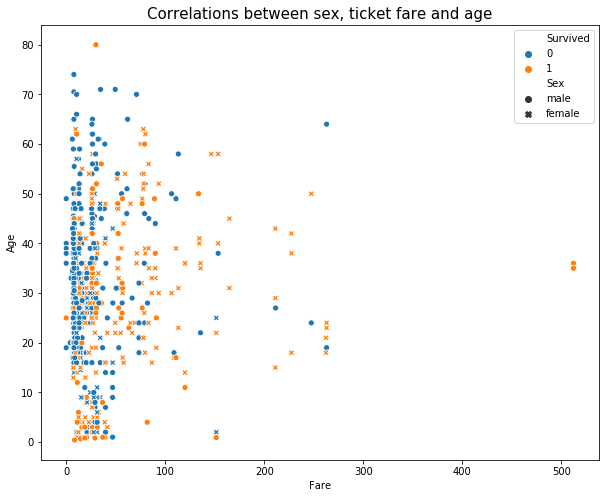

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=train_df['Fare'], y=train_df['Age'], hue=train_df['Survived'], style=train_df['Sex'])
plt.title('Correlations between sex, ticket fare and age', size=15);

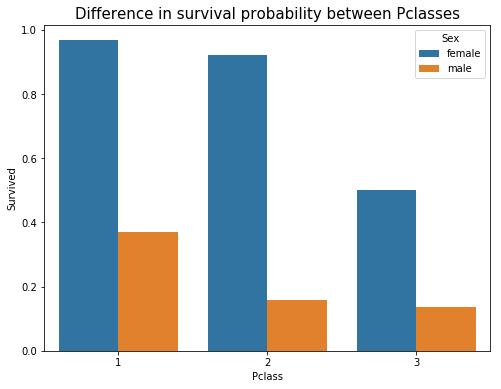

In [44]:
temp_pclass = train_df[['Pclass', 'Survived', 'Sex']].groupby(['Pclass', 'Sex'], as_index=False).mean()

plt.figure(figsize=(8,6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=temp_pclass)
plt.title('Difference in survival probability between Pclasses', size=15);

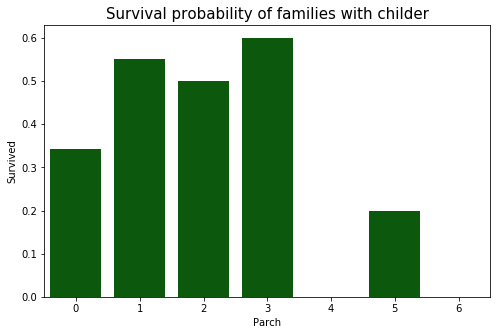

In [46]:
temp_pclass = train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

plt.figure(figsize=(8,5))
sns.barplot(x='Parch', y='Survived', data=temp_pclass, color='darkgreen')

plt.title('Survival probability of families with childer', size=15);


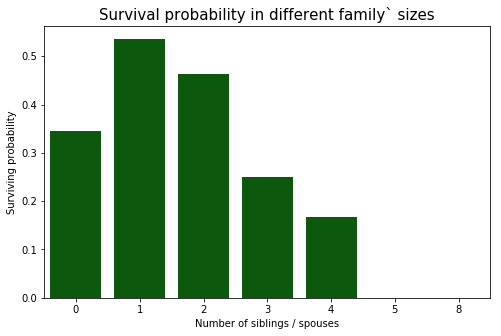

In [47]:

temp_sibsp = train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

plt.figure(figsize=(8,5))
sns.barplot(x='SibSp', y='Survived', data=temp_sibsp, color='darkgreen')

plt.xlabel('Number of siblings / spouses')
plt.ylabel('Surviving probability')
plt.title('Survival probability in different family` sizes', size=15);


In [48]:
full_df.loc[full_df['Sex'] == 'male', 'Sex'] = 1
full_df.loc[full_df['Sex'] == 'female', 'Sex'] = 0

full_df['Sex'] = full_df['Sex'].astype('int')

In [49]:
import re

In [58]:
def title(names):
        title_search = re.search(' ([A-Za-z]+)\.', names)
        if title_search:
            return title_search.group(1)
        return ""

In [59]:
full_df['Title'] = full_df['Name'].apply(title)


In [60]:
full_df['Title'].value_counts()


Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Capt          1
Don           1
Dona          1
Countess      1
Lady          1
Mme           1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [61]:
full_df['Title'] = full_df['Title'].replace(['Don', 'Rev', 'Dr','Major', 'Col', 'Capt', 'Countess','Jonkheer', 'Dona'], 'untitled')

In [62]:
full_df['Title'].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'untitled', 'Mme', 'Ms', 'Lady',
       'Sir', 'Mlle'], dtype=object)

In [63]:
full_df.loc[full_df['Title']=='Master', 'Title'] = 'Mr'
full_df.loc[full_df['Title']=='Mlle', 'Title'] = 'Miss'
full_df.loc[full_df['Title']=='Mme', 'Title'] = 'Miss'
full_df.loc[full_df['Title']=='Ms', 'Title'] = 'Miss'
full_df.loc[full_df['Title']=='Sir', 'Title'] = 'Mr'
full_df.loc[full_df['Title']=='Lady', 'Title'] = 'Miss'

In [64]:
full_df['Title'].value_counts()


Mr          819
Miss        266
Mrs         197
untitled     27
Name: Title, dtype: int64

In [65]:
temp_title = full_df[['Title', 'Survived']].groupby('Title', as_index=False).mean()
temp_title

,Title,Survived
0,Miss,0.705882
1,Mr,0.188172
2,Mrs,0.792000
3,untitled,0.285714


In [71]:
title_dict = dict(Mrs = 0, Miss = 1, untitled = 2, Mr = 3)

full_df['Title'] = full_df['Title'].replace(title_dict)

full_df = full_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)



TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [72]:
full_df['Title']

0      3
1      0
2      1
3      0
4      3
      ..
413    3
414    2
415    3
416    3
417    3
Name: Title, Length: 1309, dtype: int64

In [73]:
full_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,1,22.0,1,0,7.2500,S,3
1,2,1.0,1,0,38.0,1,0,71.2833,C,0
2,3,1.0,3,0,26.0,0,0,7.9250,S,1
3,4,1.0,1,0,35.0,1,0,53.1000,S,0
4,5,0.0,3,1,35.0,0,0,8.0500,S,3


In [74]:
full_df.query('Fare == "NaN"')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,1044,NaN,3,1,60.5,0,0,NaN,S,3


In [87]:
full_df['Fare'] = full_df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(value=x.median()))

In [86]:
full_df['Fare'].mean()

33.2954792813456

In [88]:
full_df.query('PassengerId == 1044')


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
152,1044,NaN,3,1,60.5,0,0,8.05,S,3


In [96]:
full_df.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

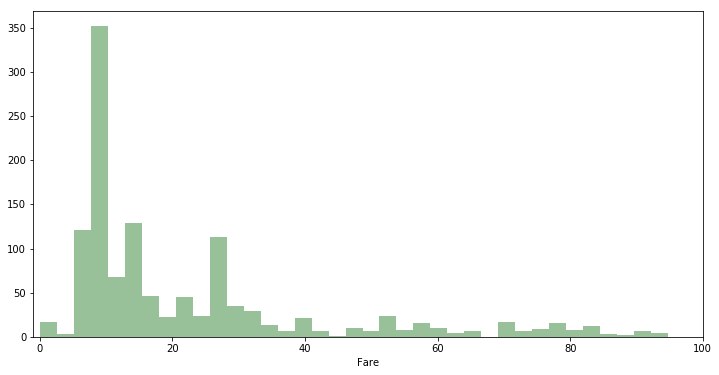

In [98]:
plt.figure(figsize=(12,6))
plt.xlim(-1,100)
sns.distplot(full_df['Fare'], kde=False, bins=200, color='darkgreen')

In [102]:
full_df['Fare'].max()

512.3292

In [103]:
def fare_into_bins(row):
    
    fare = row['Fare']
    
    if 0 <= fare < 15:
        return 'cheap'
    elif 15 <= fare < 42:
        return 'moderate'
    elif 42 <= fare < 65:
        return 'expensive'
    elif 65 <= fare < 100:
        return 'business'
    else:
        return 'luxury'
    
full_df['Fare_bins'] = full_df.apply(fare_into_bins, axis=1)

In [104]:
full_df[['Fare_bins', 'Survived']].groupby('Fare_bins',as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare_bins,Survived
3,luxury,0.735849
0,business,0.646154
2,expensive,0.555556
4,moderate,0.446565
1,cheap,0.249453


In [105]:
full_df.loc[full_df['Embarked'].isna()]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare_bins
61,62,1.0,1,0,38.0,0,0,80.0,NaN,1,business
829,830,1.0,1,0,62.0,0,0,80.0,NaN,0,business


In [106]:
full_df[['Fare_bins','Embarked','Survived']].groupby(['Embarked','Fare_bins'], as_index=False).mean().query('Fare_bins == "business"')

,Embarked,Fare_bins,Survived
0,C,business,0.869565
5,Q,business,0.500000
8,S,business,0.500000


In [107]:
full_df['Embarked'] = full_df['Embarked'].fillna('C')


In [114]:
full_df['Embarked'].value_counts()


S    914
C    272
Q    123
Name: Embarked, dtype: int64

In [117]:
full_df = pd.get_dummies(full_df, drop_first=True)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
PassengerId            1309 non-null int64
Survived               891 non-null float64
Pclass                 1309 non-null int64
Sex                    1309 non-null int64
Age                    1046 non-null float64
SibSp                  1309 non-null int64
Parch                  1309 non-null int64
Fare                   1309 non-null float64
Title                  1309 non-null int64
Embarked_Q             1309 non-null uint8
Embarked_S             1309 non-null uint8
Fare_bins_cheap        1309 non-null uint8
Fare_bins_expensive    1309 non-null uint8
Fare_bins_luxury       1309 non-null uint8
Fare_bins_moderate     1309 non-null uint8
dtypes: float64(3), int64(6), uint8(6)
memory usage: 149.9 KB


In [118]:
full_df.loc[full_df['Age'] < 1, 'Age'] = 1


In [119]:
full_df['Age'] = full_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(value=x.median()))
full_df['Age'] = full_df['Age'].astype('int')

In [120]:
full_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S,Fare_bins_cheap,Fare_bins_expensive,Fare_bins_luxury,Fare_bins_moderate
0,1,0.0,3,1,22,1,0,7.2500,3,0,1,1,0,0,0
1,2,1.0,1,0,38,1,0,71.2833,0,0,0,0,0,0,0
2,3,1.0,3,0,26,0,0,7.9250,1,0,1,1,0,0,0
3,4,1.0,1,0,35,1,0,53.1000,0,0,1,0,1,0,0
4,5,0.0,3,1,35,0,0,8.0500,3,0,1,1,0,0,0


In [121]:
full_df.loc[full_df['Age'] < 1, 'Age'] = 1


In [122]:
full_df['Age'] = full_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(value=x.median()))
full_df['Age'] = full_df['Age'].astype('int')

In [124]:
full_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S,Fare_bins_cheap,Fare_bins_expensive,Fare_bins_luxury,Fare_bins_moderate
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,0.644003,29.246753,0.498854,0.385027,33.276193,2.121467,0.093965,0.698243,0.514133,0.063407,0.064171,0.288006
std,378.020061,0.486592,0.837836,0.478997,13.209188,1.041658,0.865560,51.743584,1.190459,0.291891,0.459196,0.499991,0.243787,0.245151,0.453007
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,982.000000,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [125]:
full_df['Fam_size'] = full_df['SibSp'] + full_df['Parch'] + 1
full_df[['Fam_size', 'Survived']].groupby('Fam_size', as_index=False).mean()


,Fam_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [126]:
full_df['Fam_size'] = full_df['Fam_size'].replace([5,6,7,8,11],1)
full_df[['Fam_size', 'Survived']].groupby('Fam_size', as_index=False).mean()


,Fam_size,Survived
0,1,0.288815
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [127]:
def alone(row):
    
    size=row['Fam_size']
    
    if size == 1:
        return 1
    else:
        return 0
    
full_df['Lon_trav'] = full_df.apply(alone, axis=1)


In [128]:
full_df[['Lon_trav','Survived']].groupby('Lon_trav', as_index=False).mean()

,Lon_trav,Survived
0,0,0.578767
1,1,0.288815


In [129]:
full_df[['Pclass', 'Title', 'Survived']].groupby(['Pclass', 'Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Title,Survived
0,1,0,0.976190
1,1,1,0.960000
5,2,1,0.942857
4,2,0,0.902439
8,3,0,0.500000
9,3,1,0.500000
2,1,2,0.461538
3,1,3,0.369369
7,2,3,0.170000
10,3,3,0.135447


In [132]:
full_df.describe().shape



(8, 17)

In [152]:
train_df = full_df.iloc[:891, : ]
test_df = full_df.iloc[891:, : ].drop(['Survived'], axis = 1)
X_train = train_df.drop(["Survived",'PassengerId'], axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked_Q,Embarked_S,Fare_bins_cheap,Fare_bins_expensive,Fare_bins_luxury,Fare_bins_moderate,Fam_size,Lon_trav
0,3,1,34,0,0,7.8292,3,1,0,1,0,0,0,1,1
1,3,0,47,1,0,7.0000,0,0,1,1,0,0,0,2,0
2,2,1,62,0,0,9.6875,3,1,0,1,0,0,0,1,1
3,3,1,27,0,0,8.6625,3,0,1,1,0,0,0,1,1
4,3,0,22,1,1,12.2875,0,0,1,1,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1,25,0,0,8.0500,3,0,1,1,0,0,0,1,1
414,1,0,39,0,0,108.9000,2,0,0,0,0,1,0,1,1
415,3,1,38,0,0,7.2500,3,0,1,1,0,0,0,1,1
416,3,1,25,0,0,8.0500,3,0,1,1,0,0,0,1,1


In [164]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.43

In [187]:
Y_prediction
Y_prediction = Y_prediction.astype(np.int)
df = pd.DataFrame(data=Y_prediction, columns=["Survived"])


In [188]:
sd = pd.concat([test_index,df], axis = 1,)
sd['Survived'].astype(int)
sd

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [189]:
sd.to_csv('output.csv', index = False)